In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import requests
from io import StringIO
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day24-standardization/Social_Network_Ads.csv'
headers = {"User-agent":"xyz"}
req= requests.get(url, headers = headers)
data = StringIO(req.text)
df=pd.read_csv(data)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
214,47,43000,0
145,24,89000,0
12,20,86000,0
154,40,47000,0
335,36,54000,0


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                   df['Purchased'],test_size=0.3,
                                                   random_state=42)
x_train.shape, x_test.shape

((280, 2), (120, 2))

- When you set random_state=0, you ensure reproducibility, meaning every 
  time you run the code, you will get the same split.
- axis=1 → Refers to columns (horizontal direction).

## StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train) #fit means to find mean and s.d.

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Don’t fit on test → avoids leakage.
#Do transform test → keeps data consistent with training.

In [8]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [9]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [10]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [11]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


## Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

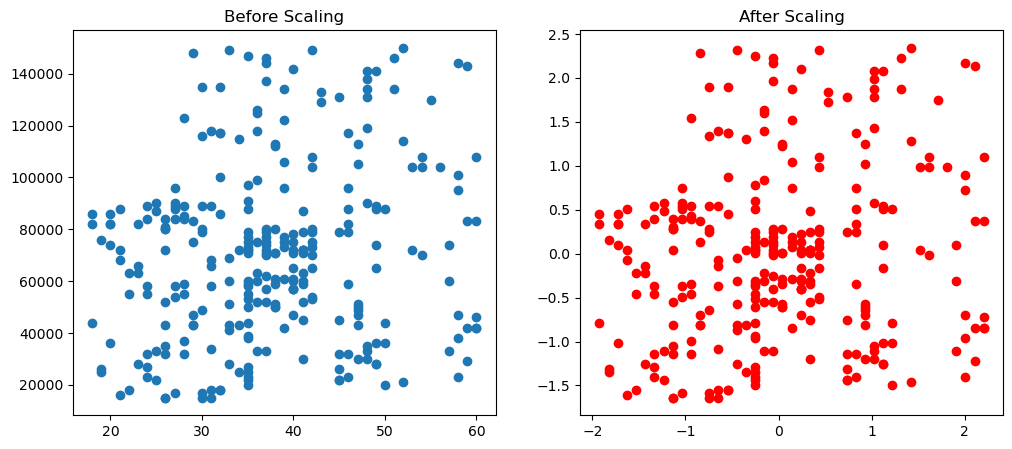

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color= 'red')
ax2.set_title("After Scaling")

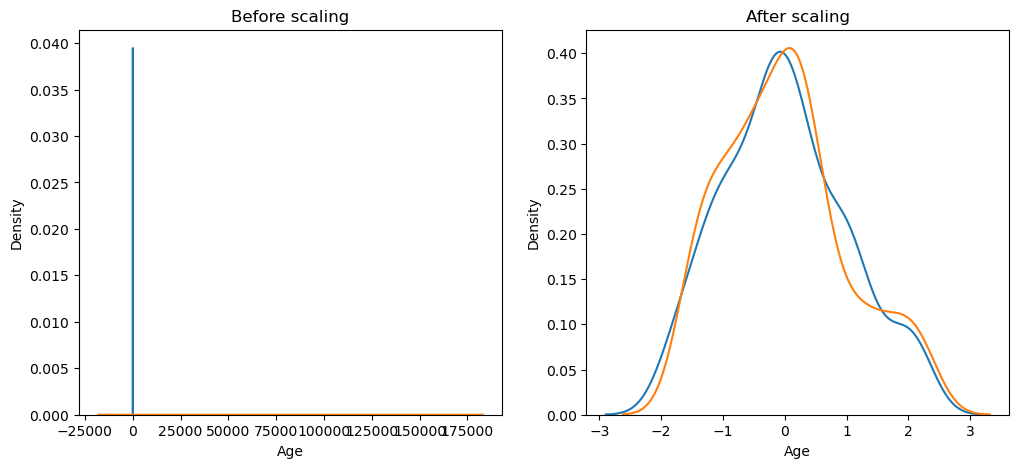

In [13]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize=(12,5))

#before scaling
ax1.set_title('Before scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title('After scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

## Comparison of Distributions

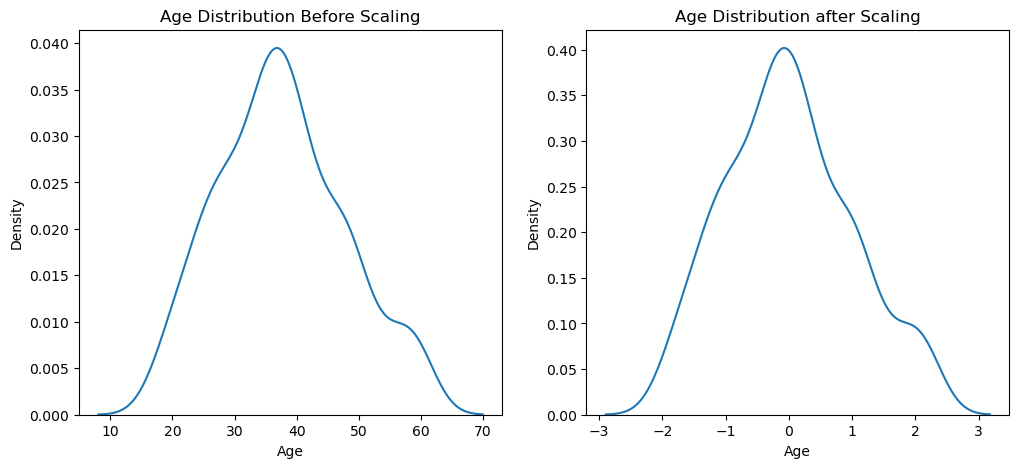

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1) #ax here is axes. and not x and y axis

#after scaling
ax2.set_title('Age Distribution after Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)

plt.show()

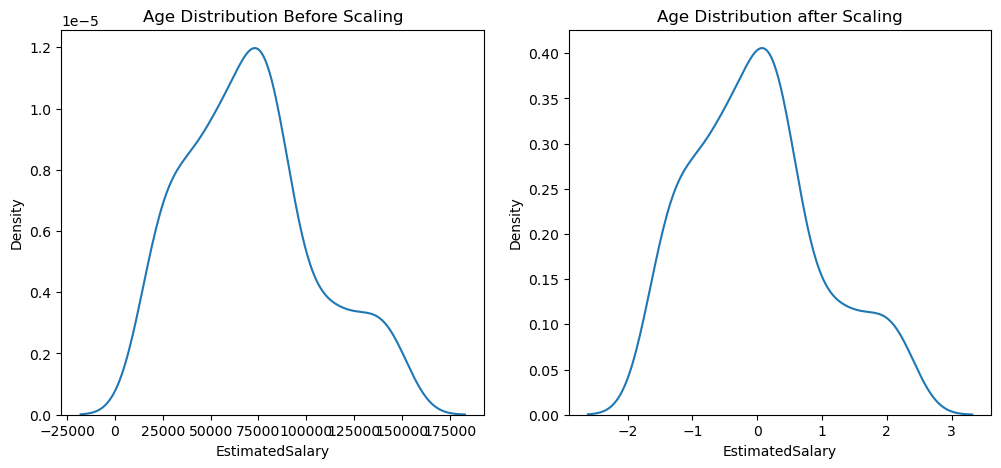

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title('Age Distribution after Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

## Why Scaling is Important

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression(solver='lbfgs', random_state=42, max_iter=1000)
lr_scaled = LogisticRegression(solver='lbfgs', random_state=42, max_iter=1000)

In [18]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [19]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print("Actual",accuracy_score(y_test,y_pred)*100)
print("Scaled",accuracy_score(y_test,y_pred_scaled)*100)

Actual 85.0
Scaled 85.0


## Effect of Outliers

In [22]:
df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})],ignore_index=True)

In [23]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


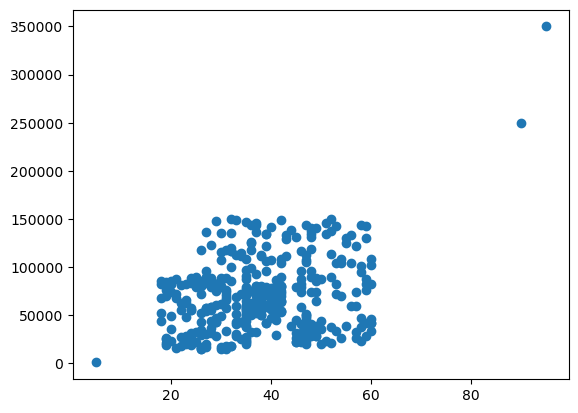

In [24]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                   df['Purchased'],
                                                   test_size = 0.3,
                                                   random_state=0)
x_train.shape, x_test.shape

((282, 2), (121, 2))

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

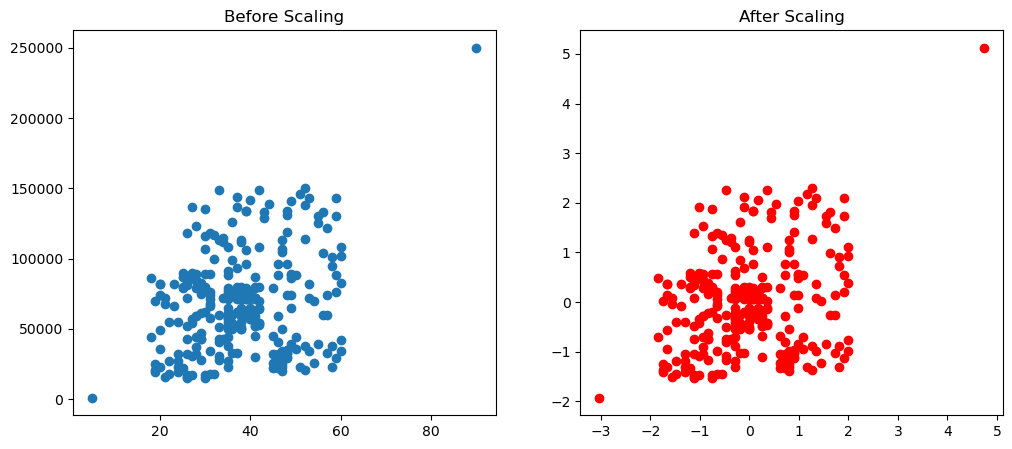

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color= 'red')
ax2.set_title('After Scaling')
plt.show()